In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch as Patch
import numpy as np
import pandas as pd
import time
import os

from sklearn.random_projection import SparseRandomProjection, johnson_lindenstrauss_min_dim
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
outdir = './data/processed_data'

## Random Projection on Diabetes Dataset

In [3]:
 # read data from the file and plot 
filename = os.path.join(outdir, f"diabetes_data_train.csv" )    
X_train = pd.read_csv(filename)

In [4]:
X_train.shape[0]

183824

In [5]:
## Identify minimum number of dimensions 

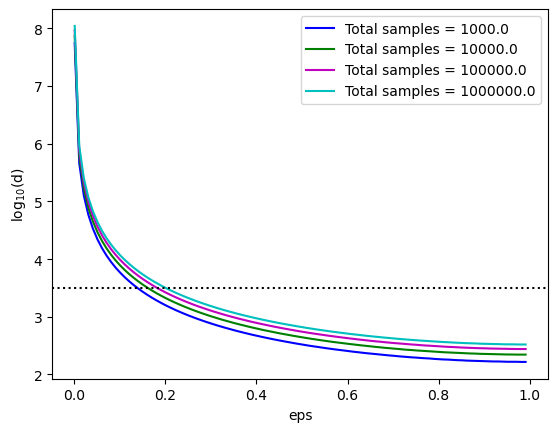

In [13]:
eps = np.arange(0.001, 0.999, 0.01)
colors = ['b', 'g', 'm', 'c']
m = [1e3, 1e4, 1e5, 1e6]
for i in range(4):
    min_dim = johnson_lindenstrauss_min_dim(n_samples=m[i], eps=eps)
    label = 'Total samples = ' + str(m[i])
    plt.plot(eps, np.log10(min_dim), c=colors[i], label=label)
    
plt.xlabel('eps')
plt.ylabel('log$_{10}$(d)')
plt.axhline(y=3.5, color='k', linestyle=':')
plt.legend()
plt.show()

In [59]:
eps = np.arange(0.001, 0.1,0.009)
print(eps)
colors = ['b', 'g', 'm', 'c']
m = np.arange(15000, X_train.shape[0],step=15000)
print(len(m))
for i in range(len(m)):
    print(f"Total number of instances: {m[i]}")
   
    min_dim = johnson_lindenstrauss_min_dim(n_samples=m[i], eps=eps[i])
    label = 'Epsilon = ' + str(eps[i])
    print(f"Minimum dimensionality needed:{min_dim}")
    #plt.plot( eps[i],min_dim, c=colors[i], label=label)
    
#plt.xlabel('eps')
#plt.ylabel('log$_{10}$(d)')
#plt.axhline(y=3.5, color='k', linestyle=':')
#plt.legend()
#plt.show()

[0.001 0.01  0.019 0.028 0.037 0.046 0.055 0.064 0.073 0.082 0.091 0.1  ]
12
Total number of instances: 15000
Minimum dimensionality needed:76977762
Total number of instances: 30000
Minimum dimensionality needed:830251
Total number of instances: 45000
Minimum dimensionality needed:240484
Total number of instances: 60000
Minimum dimensionality needed:114401
Total number of instances: 75000
Minimum dimensionality needed:67255
Total number of instances: 90000
Minimum dimensionality needed:44493
Total number of instances: 105000
Minimum dimensionality needed:31740
Total number of instances: 120000
Minimum dimensionality needed:23860
Total number of instances: 135000
Minimum dimensionality needed:18641
Total number of instances: 150000
Minimum dimensionality needed:15000
Total number of instances: 165000
Minimum dimensionality needed:12355
Total number of instances: 180000
Minimum dimensionality needed:10372


In [24]:
diabetese_proj_gauss = SparseRandomProjection(random_state=42,eps=0.99)
X_transformed = diabetese_proj_gauss.fit_transform(X_train[:180000])

ValueError: eps=0.990000 and n_samples=180000 lead to a target dimension of 290 which is larger than the original space with n_features=21

## Random Projection on Insurance Dataset

In [64]:
# read data from the file and plot 
filename = os.path.join(outdir, f"insurance_data_train.csv" )    
X_train_insurance = pd.read_csv(filename)

In [65]:
X_train_insurance.shape[0]

46873

In [66]:
eps = np.arange(0.001, 0.1,0.009)
print(eps)
colors = ['b', 'g', 'm', 'c']
m = np.arange(5000, X_train_insurance.shape[0],step=10000)
print(len(m))
for i in range(len(m)):
    print(f"Total number of instances: {m[i]}")
   
    min_dim = johnson_lindenstrauss_min_dim(n_samples=m[i], eps=eps[i])
    label = 'Epsilon = ' + str(eps[i])
    print(f"Minimum dimensionality needed:{min_dim}")

[0.001 0.01  0.019 0.028 0.037 0.046 0.055 0.064 0.073 0.082 0.091 0.1  ]
5
Total number of instances: 5000
Minimum dimensionality needed:68183000
Total number of instances: 15000
Minimum dimensionality needed:774427
Total number of instances: 25000
Minimum dimensionality needed:227291
Total number of instances: 35000
Minimum dimensionality needed:108797
Total number of instances: 45000
Minimum dimensionality needed:64195


In [67]:
insurance_proj_gauss = SparseRandomProjection(random_state=42,eps=0.1)
X_insurnace_transformed = insurance_proj_gauss.fit_transform(X_train_insurance)


ValueError: eps=0.100000 and n_samples=46873 lead to a target dimension of 9218 which is larger than the original space with n_features=40